# Importing the Depedencies:

In [1]:
import numpy as np               #FOR CONVERTING IMAGES IN ARRAYS
import matplotlib.pyplot as plt  #FOR VISUALIZATION
import seaborn as sns            #FOR VISUALIZATION
import cv2                       #Image processing 
from PIL import Image            #Image processing
import tensorflow as tf          #Deep learning library
tf.random.set_seed(3)            #For random set or random 3 values
from tensorflow import keras     #google based library 
from keras.datasets import mnist #dataset inbuild
from tensorflow.math import confusion_matrix 
import warnings
warnings.filterwarnings('ignore')

# Data Collection MNIST DATA from keras.datasets

In [4]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 9s 1us/step


In [5]:
type(X_train)

numpy.ndarray

## Shape of numpy arrays or our data

In [8]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


**Training Data = 60000 images**

**Test Data = 10000 images**

**Image dimension --> 28 x 28**

**Grayscale Image --> 1 channel**

## Printing the 10th image


In [10]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [12]:
print(X_train[10].shape)

(28, 28)


## Displaying this image

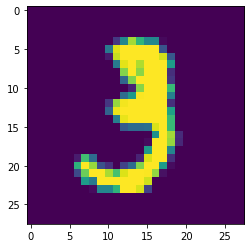

3


In [16]:
plt.imshow(X_train[10])
plt.show()

print(Y_train[10])

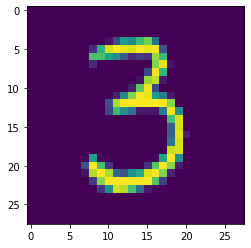

3


In [18]:
#Similarly
plt.imshow(X_train[50])
plt.show()

print(Y_train[50])

## Image labels

**ALL THE IMAGES IN THIS DATA SET ARE IN SAME DIMENSION**

In [19]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [21]:
# Unique values in Y_train
print(np.unique(Y_train))
# Unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**We can use these labels as such or we can also apply One Hot Encoding**

## Scaling the value ---Normalization

**Ranges 0-255 we will convert into 0-1** 

In [22]:
X_train=X_train/255
X_test=X_test/255

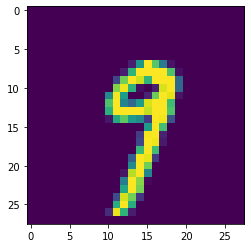

9


In [25]:
plt.imshow(X_train[133])
plt.show()

print(Y_train[133])


# Building the Neural Network

## Setting up the layers for ANN:

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),   # our number of neurons in layer
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') #number of values 0-9=10
])

## Compiling the ANN:

In [28]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Training the NN:

In [32]:
model.fit(X_train,Y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0275 - accuracy: 0.9908
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0253 - accuracy: 0.9912
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0195 - accuracy: 0.9932
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0204 - accuracy: 0.9930
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0195 - accuracy: 0.9936
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0165 - accuracy: 0.9942
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0164 - accuracy: 0.9944
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0155 - accuracy: 0.9947
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0144 - accuracy: 0.9951
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

### OUR TRAINING DATASET ACCURACY IS 99.62%

## Accuracy on Test Data

In [33]:
loss, accuracy= model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 3s 2ms/step - loss: 0.1540 - accuracy: 0.9738
0.973800003528595


### OUR TRAINING DATASET ACCURACY IS 97.38%

In [34]:
print(X_test.shape)

(10000, 28, 28)


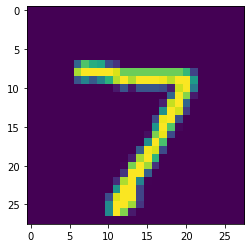

In [37]:
#FIRST DATAPOINT IN X_test
plt.imshow(X_test[0])
plt.show()

In [38]:
print(Y_test[0])

7


#### Checking the individual predictions by our model

In [39]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [40]:
print(Y_pred.shape)

(10000, 10)


In [42]:
print(Y_pred[0])    #This is the probabilty that the label is 0 and second is the probabilty for 1 and so on

[6.4279318e-02 1.4955965e-07 1.7846103e-01 2.6935709e-01 2.9442739e-12
 3.7956487e-02 2.1543539e-14 1.0000000e+00 4.1651595e-04 3.0025711e-02]


### Converting the prediction proabilities to class label

In [45]:
label_for_first_image = np.argmax(Y_pred[0])    #Index of the number compare to other values -- argmax()

In [47]:
print(label_for_first_image)

7


### Converting the prediction proabilities to class label for all test data point

In [50]:
Y_pred_labels= [np.argmax(i) for i in Y_pred]

In [52]:
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 4, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 1, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 5, 0, 4, 1, 9, 5, 7, 8, 9, 3, 3, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 3, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 3, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 7, 4, 2, 0, 7, 1, 1, 2, 1, 

**Y_test ---> True labels**

**Y_pred_labels ---> My predcited Labels**

## Confusion matrix

In [53]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [54]:
print(conf_mat)

tf.Tensor(
[[ 964    1    1    1    1    5    1    2    4    0]
 [   0 1127    2    1    0    0    1    0    4    0]
 [   4   31  968    5    6    1    5    6    6    0]
 [   0    0    9  983    0    7    0    3    3    5]
 [   0    0    3    1  967    0    4    0    1    6]
 [   2    0    0   20    1  856    2    2    7    2]
 [   8    3    3    1   16   18  907    0    2    0]
 [   0    4   19    7    4    1    0  982    6    5]
 [   1    0    3    5    8    7    2    3  939    6]
 [   0    3    0    6   19    8    2    6    5  960]], shape=(10, 10), dtype=int32)


### Bulding a heatmap for this confusion matrix

Text(0.5, 69.0, 'Predicted Labels')

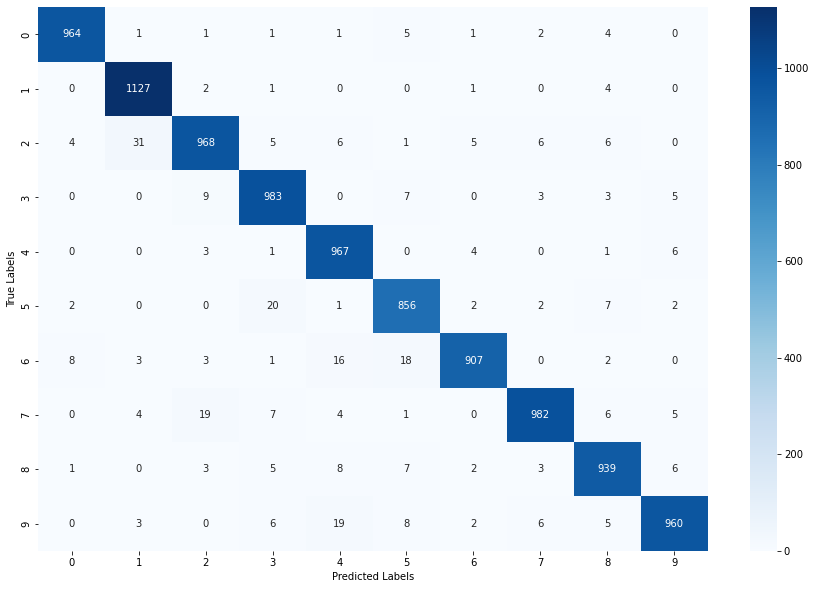

In [59]:
plt.figure(figsize=(15,10))
sns.heatmap(conf_mat,annot=True,cmap='Blues', fmt='d')
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

# Building a Predictive System For our model